In [1]:
## Import Libraries
import pandas as pd
import pandas as np
# Import libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
## Read the data
data = pd.read_csv('./data/clean_athlete.csv')
data.head()

,ID,Name,Age,Sex,Height,Weight,Year,Team,NOC,region,Games,Season,City,Sport,Event,Medal
0,1,A Dijiang,24,M,180,80,1992,China,CHN,China,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,23,M,170,60,2012,China,CHN,China,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,24,M,175,70,1920,Denmark,DEN,Denmark,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,34,M,175,70,1900,Denmark/Sweden,DEN,Denmark,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,21,F,185,82,1988,Netherlands,NED,Netherlands,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [3]:
## Dropping irrevlant columns
data = data[['Age', 'Sex', 'Height', 'Weight', 'region', 'City', 'Sport', 'Medal']]

In [4]:
data

,Age,Sex,Height,Weight,region,City,Sport,Medal
0,24,M,180,80,China,Barcelona,Basketball,None
1,23,M,170,60,China,London,Judo,None
2,24,M,175,70,Denmark,Antwerpen,Football,None
3,34,M,175,70,Denmark,Paris,Tug-Of-War,Gold
4,21,F,185,82,Netherlands,Calgary,Speed Skating,None
...,...,...,...,...,...,...,...,...
263381,29,M,179,89,Poland,Innsbruck,Luge,None
263382,27,M,176,59,Poland,Sochi,Ski Jumping,None
263383,27,M,176,59,Poland,Sochi,Ski Jumping,None
263384,30,M,185,96,Poland,Nagano,Bobsleigh,None


In [23]:
# simple check for nulls
data.isna().sum()

Age       0
Sex       0
Height    0
Weight    0
region    0
City      0
Sport     0
Medal     0
dtype: int64

In [24]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [25]:
data['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Military Ski Patrol', 'Croquet',
       'Jeu De Paume', 'Roque', 'Alpinism', 'Motorb

In [26]:
data['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'USA', 'Finland', 'Norway',
       'Romania', 'Estonia', 'France', 'Morocco', 'Spain', 'Egypt',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria',
       'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria', 'Lebanon',
       'Qatar', 'Malaysia', 'Iran', 'Canada', 'Ireland', 'Australia',
       'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia',
       'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'Saudi Arabia', 'Maldives', 'Ethiopia',
       'United Arab Emirates', 'Yemen', 'Indonesia', 'Philippines',
       'None', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Japan',
       'Switzerland', 'Brazil', 'Germany', 'Monaco', 'Israel', 'Uruguay',
       'Sweden', 'Virgin Islands, US', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Benin', 

In [27]:
data['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Turin', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [ ]:
# set aside and save unseen data set
data_unseen = data.sample(n=10000)
data = data.drop(data_unseen.index)
print(f'Data for model: {data.shape},\nData for unseen predictions: {data_unseen.shape}')
data_unseen.to_csv('./data/olympics_unseen.csv', index=False)

In [5]:
# data.columns!='Medal'
X = data.loc[: , data.columns!='Medal']
y = data.loc[: , data.columns =='Medal']

In [6]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# encoding 
# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(num_cols, '\n', cat_cols)

['Age', 'Height', 'Weight'] 
 ['Sex', 'region', 'City', 'Sport']


In [8]:
 X_train.select_dtypes(exclude=['object']).columns.tolist()

['Age', 'Height', 'Weight']

In [9]:
# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [10]:
# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N/A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [11]:
# combine both the pipelines
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])
full_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Height', 'Weight']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N/A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'region', 'City', 'Sport'])])

In [12]:
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt', max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                                      oob_score=False, verbose=0, warm_start=False)

In [13]:
# build the model
et_olympics = make_pipeline(full_pipe, model)
et_olympics

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'region', 'City',
                                                   'Sport'])])),
                ('extratreesclassifier', ExtraTreesClassifier(n_jobs=-1))])

In [14]:
%%time
# train the model
et_olympics.fit(X_train, y_train)

C:\Users\HP\miniconda3\envs\pyc310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\miniconda3\envs\pyc310\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Wall time: 2min 22s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'region', 'City',
                                                   'Sport'])])),
                ('extratreesclassifier', ExtraTreesClassifier(n_jobs=-1))])

In [15]:
# make predictions on the test set
y_pred = et_olympics.predict(X_test)
y_pred

array(['None', 'None', 'None', ..., 'Gold', 'None', 'None'], dtype=object)

In [35]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy*100:,.1f}%')
print(f'Precision: {precision*100:,.1f}%')
print(f'Recall: {recall*100:,.1f}%')


Accuracy: 86.4%
Precision: 85.2%
Recall: 86.4%


In [30]:
# Export the pipeline to a file
import joblib
joblib.dump(et_olympics, 'sk_olympics.pkl')

['sk_olympics.pkl']

### Predciting against unseen Data

In [28]:
new_dat = pd.read_csv('./data/olympics_unseen.csv')
new_dat.head()

,ID,Name,Age,Sex,Height,Weight,Year,Team,NOC,region,Games,Season,City,Sport,Event,Medal
0,35803,Laura lodie Flessel-Colovic,28,F,171,55,2000,France,FRA,France,2000 Summer,Summer,Sydney,Fencing,"Fencing Women's epee, Team",None
1,28657,Ding Feng,25,M,175,80,2012,China,CHN,China,2012 Summer,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Bronze
2,115655,Kirsten Strange-Campbell,28,F,176,64,1972,Denmark,DEN,Denmark,1972 Summer,Summer,Munich,Swimming,Swimming Women's 200 metres Individual Medley,None
3,29635,Raymond Camille Dot,25,M,175,70,1952,France,FRA,France,1952 Summer,Summer,Helsinki,Gymnastics,Gymnastics Men's Horse Vault,None
4,105393,Leevan Sands,26,M,191,82,2008,Bahamas,BAH,Bahamas,2008 Summer,Summer,Beijing,Athletics,Athletics Men's Triple Jump,Bronze


In [20]:
model = joblib.load('sk_olympics.pkl')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'region', 'City',
                                                   'Sport'])])),
                ('extratreesclassifier', ExtraTreesClassifier(n_jobs=-1))])

In [21]:
pred = model.predict(new_dat)
pred

array(['Bronze', 'None', 'None', ..., 'None', 'None', 'None'],
      dtype=object)

In [29]:
new_dat['pred'] = pred
new_dat

,ID,Name,Age,Sex,Height,Weight,Year,Team,NOC,region,Games,Season,City,Sport,Event,Medal,pred
0,35803,Laura lodie Flessel-Colovic,28,F,171,55,2000,France,FRA,France,2000 Summer,Summer,Sydney,Fencing,"Fencing Women's epee, Team",None,Bronze
1,28657,Ding Feng,25,M,175,80,2012,China,CHN,China,2012 Summer,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",Bronze,None
2,115655,Kirsten Strange-Campbell,28,F,176,64,1972,Denmark,DEN,Denmark,1972 Summer,Summer,Munich,Swimming,Swimming Women's 200 metres Individual Medley,None,None
3,29635,Raymond Camille Dot,25,M,175,70,1952,France,FRA,France,1952 Summer,Summer,Helsinki,Gymnastics,Gymnastics Men's Horse Vault,None,None
4,105393,Leevan Sands,26,M,191,82,2008,Bahamas,BAH,Bahamas,2008 Summer,Summer,Beijing,Athletics,Athletics Men's Triple Jump,Bronze,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,35290,Yuriy Mykolaiovych Filatov,27,M,190,90,1976,Soviet Union,URS,Russia,1976 Summer,Summer,Montreal,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Gold
59996,111568,Khalid Skah,29,M,170,60,1996,Morocco,MAR,Morocco,1996 Summer,Summer,Atlanta,Athletics,"Athletics Men's 10,000 metres",None,None
59997,13675,Micha Boruciski,46,M,175,70,1932,Poland,POL,Poland,1932 Summer,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",None,None
59998,122169,Tsagaandorjiin Gndegmaa,22,F,152,51,1968,Mongolia,MGL,Mongolia,1968 Summer,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,None,None


In [37]:
accuracy = accuracy_score(new_dat.Medal, pred)
print(f'Accuracy: {accuracy*100:,.1f}%')

Accuracy: 93.9%


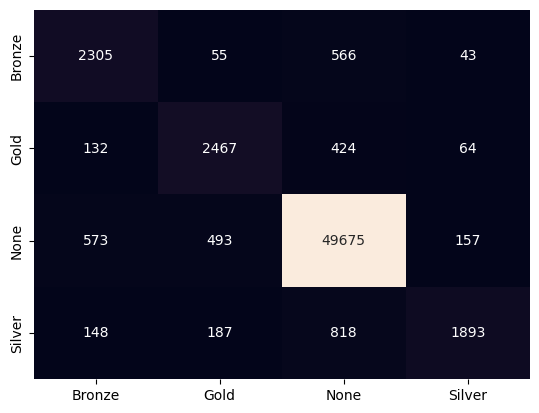

In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(new_dat['Medal'], new_dat['pred'])

id = ['Bronze', 'Gold', 'None', 'Silver']
cm_df = pd.DataFrame(cm, index = id, columns = id)
cm_df

sns.heatmap(data = cm_df, annot=True, fmt = '00', cbar=False);